Завдання (1)

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
dataset = pd.read_csv("./titanic.csv")
def print_survival_percentage(gender):
    survival_percentage = dataset[dataset['Sex'] == gender]['Survived'].mean() * 100
    print(f'Відсоток виживання серед осіб {gender} статі: {survival_percentage:.0f}%')
print_survival_percentage("male")
print_survival_percentage("female")


Відсоток виживання серед осіб male статі: 19%
Відсоток виживання серед осіб female статі: 74%


Завдання (2)

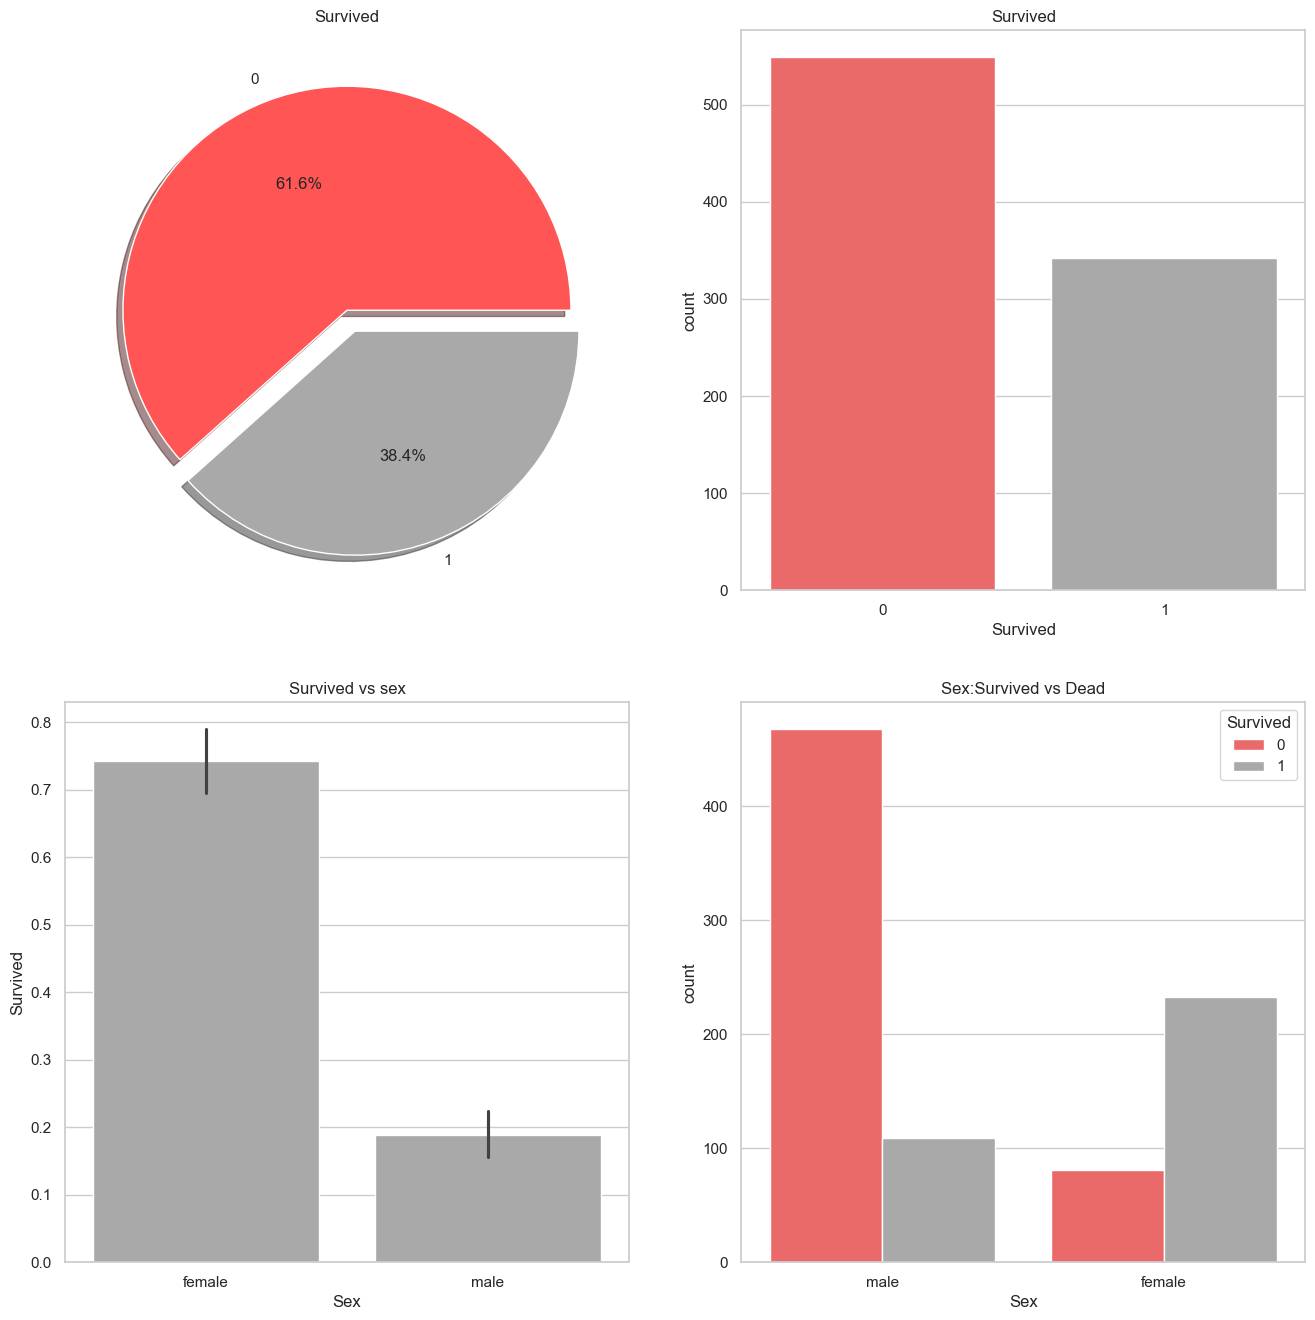

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
dataset['Survived'].value_counts().plot(kind='pie', explode=[0, 0.1], ax=axes[0, 0], autopct='%0.1f%%', colors=['#FF5555', '#A9A9A9'], shadow=True)
axes[0, 0].set_title('Survived')
axes[0, 0].set_ylabel('')
sns.countplot(x=dataset['Survived'], ax=axes[0, 1], palette=['#FF5555', '#A9A9A9'])
axes[0, 1].set_title('Survived')
sns.barplot(x=dataset['Sex'], y=dataset['Survived'], ax=axes[1, 0], color='#A9A9A9', order=['female', 'male'])
axes[1, 0].set_title('Survived vs sex')
sns.countplot(x=dataset['Sex'], hue=dataset['Survived'], ax=axes[1, 1], palette=['#FF5555', '#A9A9A9'])
axes[1, 1].set_title('Sex:Survived vs Dead')

plt.show()



На цьому графіку видно, що більшість пасажирів Титаніку загинули. Зауважте, що серед виживших переважають жінки. Ймовірно, це пов'язано із загальною тенденцією вважати, що на Титаніку джентельмени виявились більш віддані і пожертвували своїм життям, забезпечуючи безпеку жінкам і дітям.

Завдання (3)

In [123]:

missing_values = dataset.isnull().sum()
print("Кількість пропущених значень в кожній змінній:")
print(missing_values)


Кількість пропущених значень в кожній змінній:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Завдання (4)

In [71]:
females = dataset[dataset["Sex"] == "female"]
name_counts = females["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[1].value_counts()
most_common_name = name_counts.index[0]
print("The most common female name is:", most_common_name)

The most common female name is:  Mary


Завадання (5)

In [124]:
import pandas as pd

df = pd.read_csv('titanic.csv')
def get_male_name(full_name):
    name_parts = full_name.split(",")
    title = name_parts[1].split(".")[0].strip()
    first_name = name_parts[1].split(".")[1].split(" ")[1].strip()
    return first_name if title in ["Mr", "Master", "Dr"] else ""
male_names = df[df["Sex"] == "male"]["Name"].apply(get_male_name)
all_names = male_names.str.split().explode()
valid_names = all_names[all_names.str.isalpha() & (all_names.str.len() > 1)]
name_counts = valid_names.value_counts()
most_common_name = name_counts.idxmax()

print("Найпопулярніше чоловіче ім'я на кораблі:", most_common_name)



Найпопулярніше чоловіче ім'я на кораблі: William


Завдання (6)

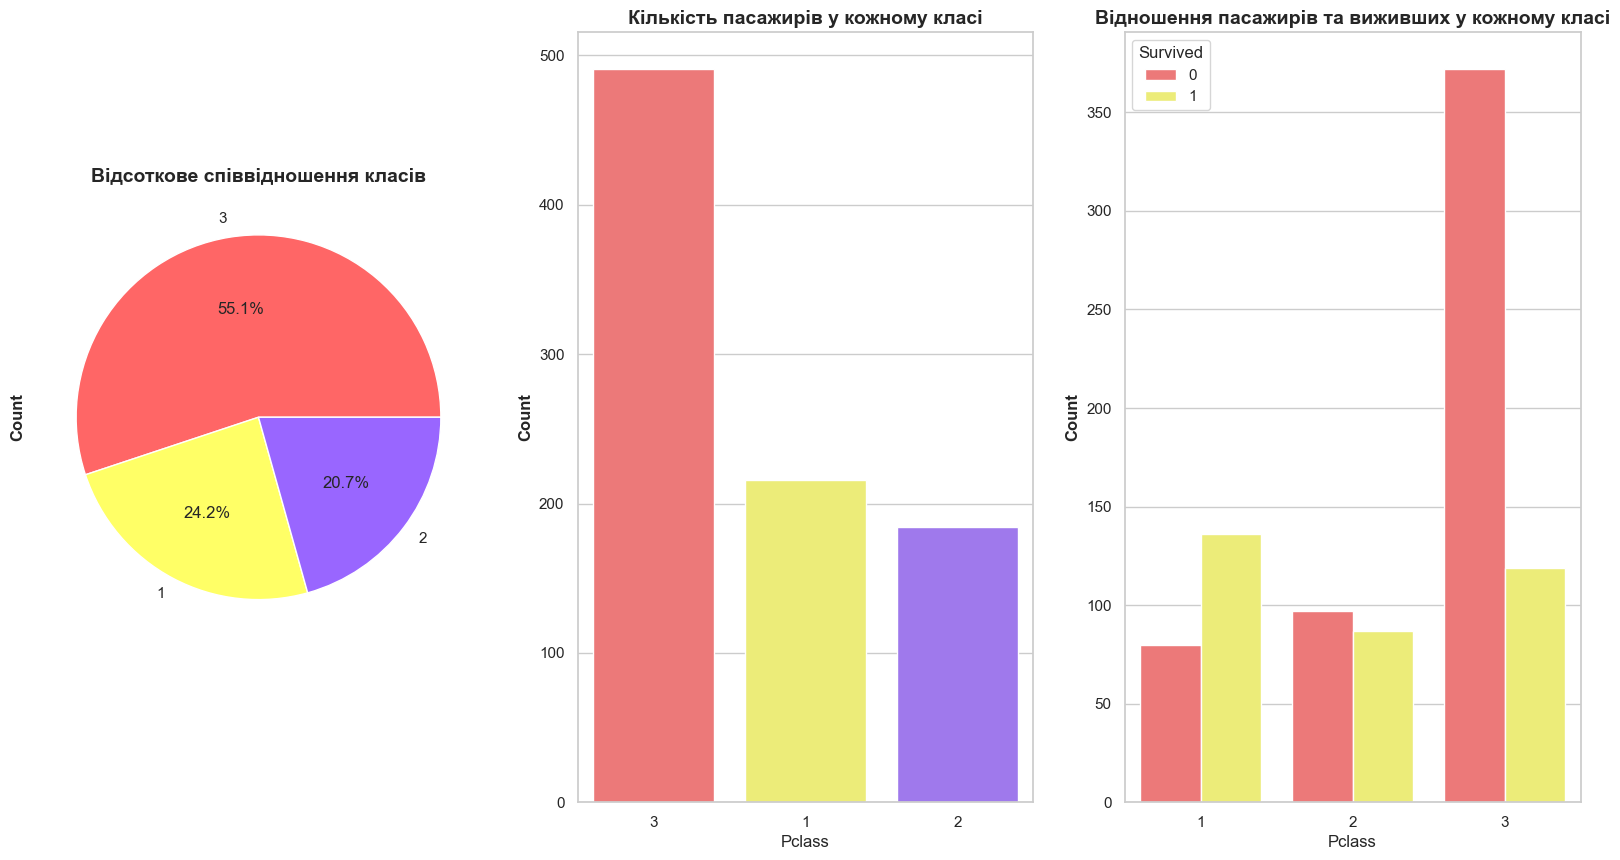

In [139]:

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
colors = ['#ff6666', '#ffff66', '#9966ff']
dataset['Pclass'].value_counts().plot.pie(autopct='%0.1f%%', ax=axes[0], colors=colors)
axes[0].set_title('Відсоткове співвідношення класів', fontsize=14, fontweight='bold')
sns.countplot(x='Pclass', data=dataset, ax=axes[1], palette=colors, order=[3, 1, 2])
axes[1].set_title('Кількість пасажирів у кожному класі', fontsize=14, fontweight='bold')
sns.countplot(x='Pclass', hue='Survived', data=dataset, ax=axes[2], palette=['#ff6666', '#ffff66'])
axes[2].set_title('Відношення пасажирів та виживших у кожному класі', fontsize=14, fontweight='bold')
for ax in axes:
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


1) Кругова діаграма ілюструє відсоток пасажирів, зазначаючи найвищий рівень смертності серед тих, хто подорожував у третьому класі.
2) Наступна гістограма також відображає відсоток пасажирів у кожному класі.
3) Остання гістограма показує розподіл виживших і загиблих у відсотках, зазначаючи найвищий рівень смертності серед пасажирів третього класу.

Завдання (7)

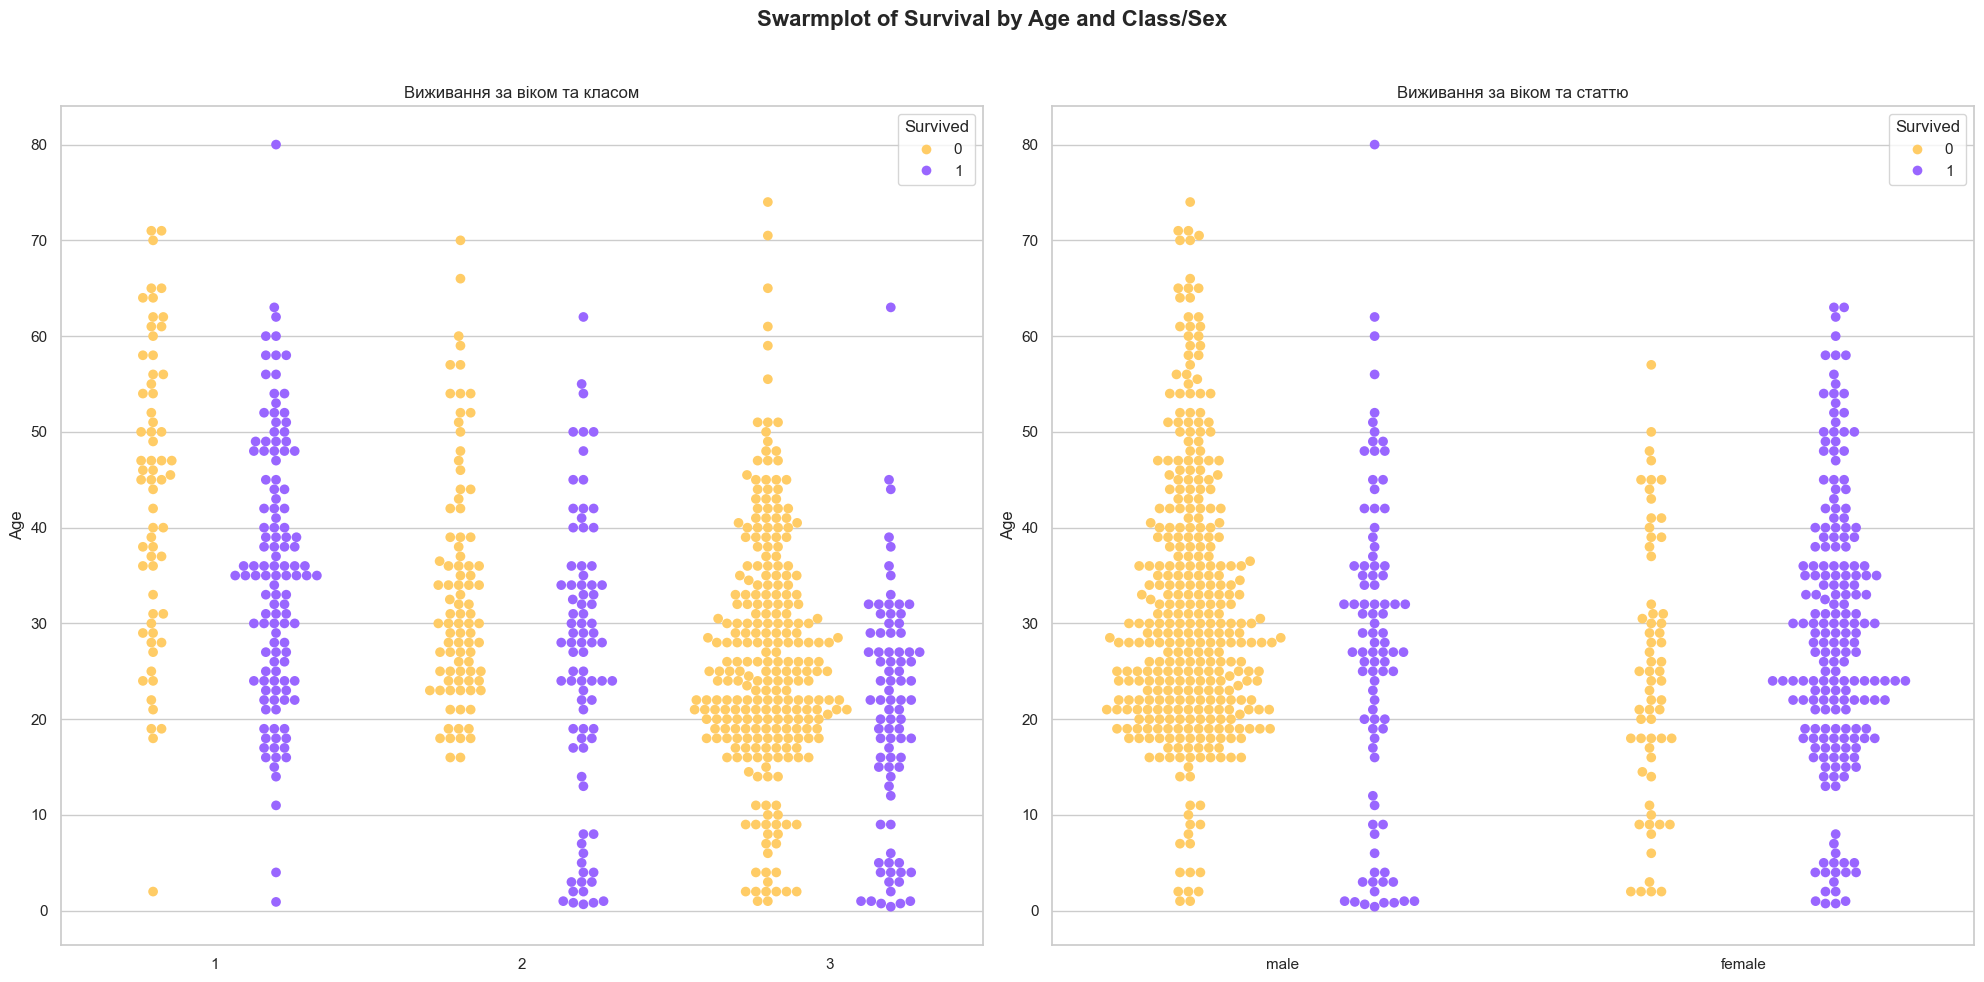

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=dataset, size=7, ax=axes[0], palette=['#ffcc66', '#9966ff'], marker='o')
axes[0].set_title('Виживання за віком та класом')
axes[0].set_xlabel('')
axes[0].set_ylabel('Age') 
sns.swarmplot(x='Sex', y='Age', hue='Survived', dodge=True, data=dataset, size=7, ax=axes[1], palette=['#ffcc66', '#9966ff'], marker='o')
axes[1].set_title('Виживання за віком та статтю')
axes[1].set_xlabel('')
axes[1].set_ylabel('Age') 
plt.suptitle('Swarmplot of Survival by Age and Class/Sex', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

1) На першому графіку кожна точка представляє пасажира, його положення по вертикалі визначає вік, по горизонталі - клас, а колір - чи вижив він чи ні. Це створює живописну картину, яка дозволяє оцінити вплив віку та класу на виживання.
2) Другий графік використовує ту ж саму концепцію, але застосовується до статі. Тут також вік представлений по вертикалі, стать - по горизонталі, і колір вказує на виживання чи загибель. 
3) Останній графік показує розподіл загиблих та виживших за віком. Він визначає, що найбільше загиблих серед чоловіків у віці від 18 до 40 років. Це створює емоційний зв'язок та допомагає зрозуміти особливості трагедії на Титаніку.

Завдання (8)

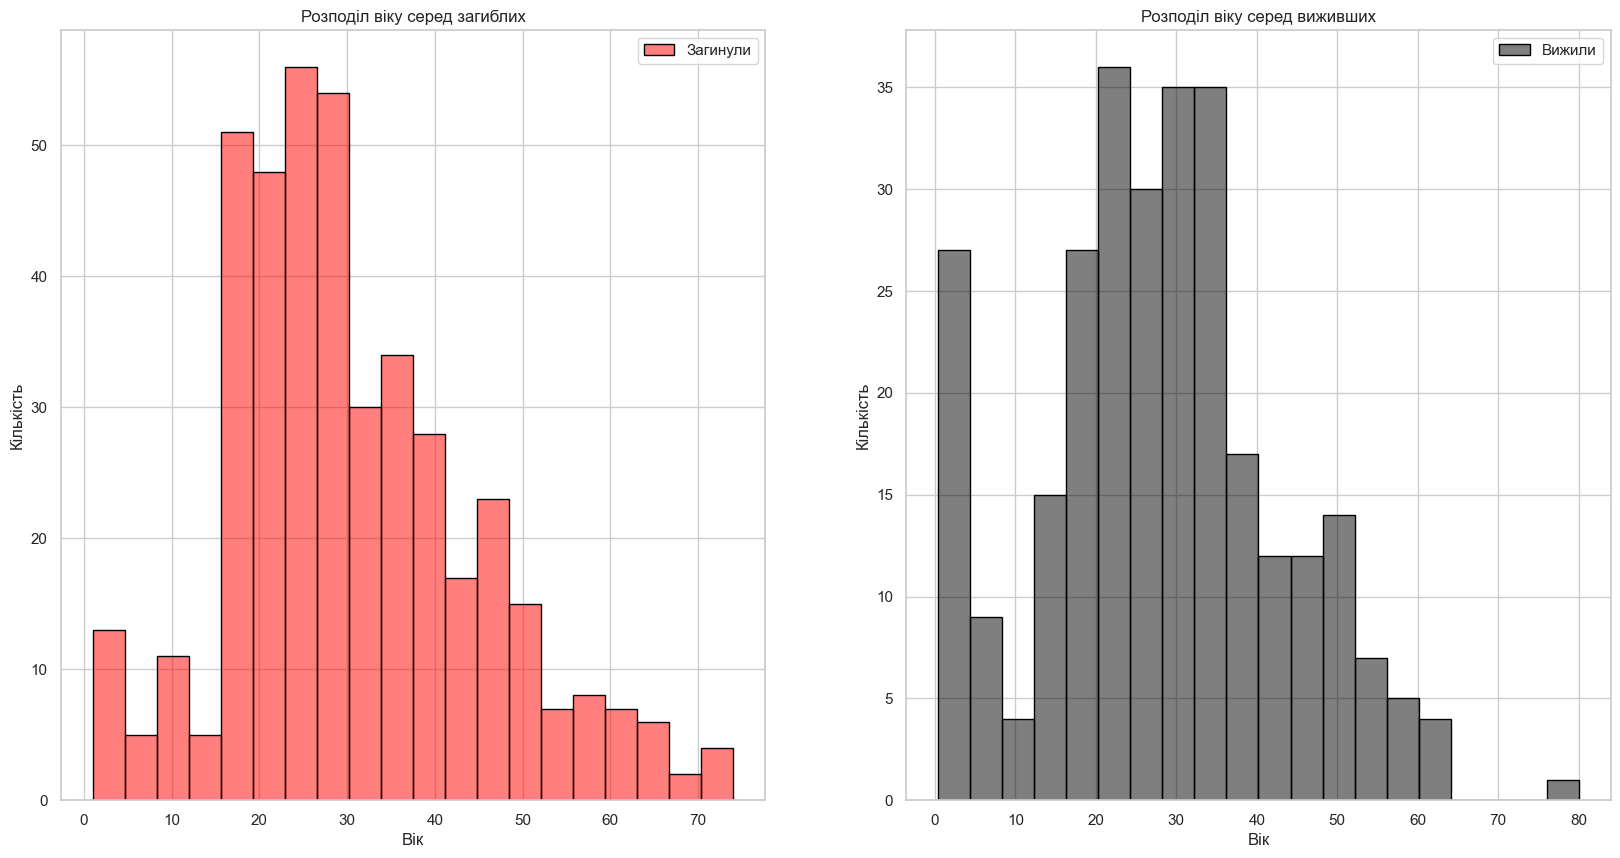

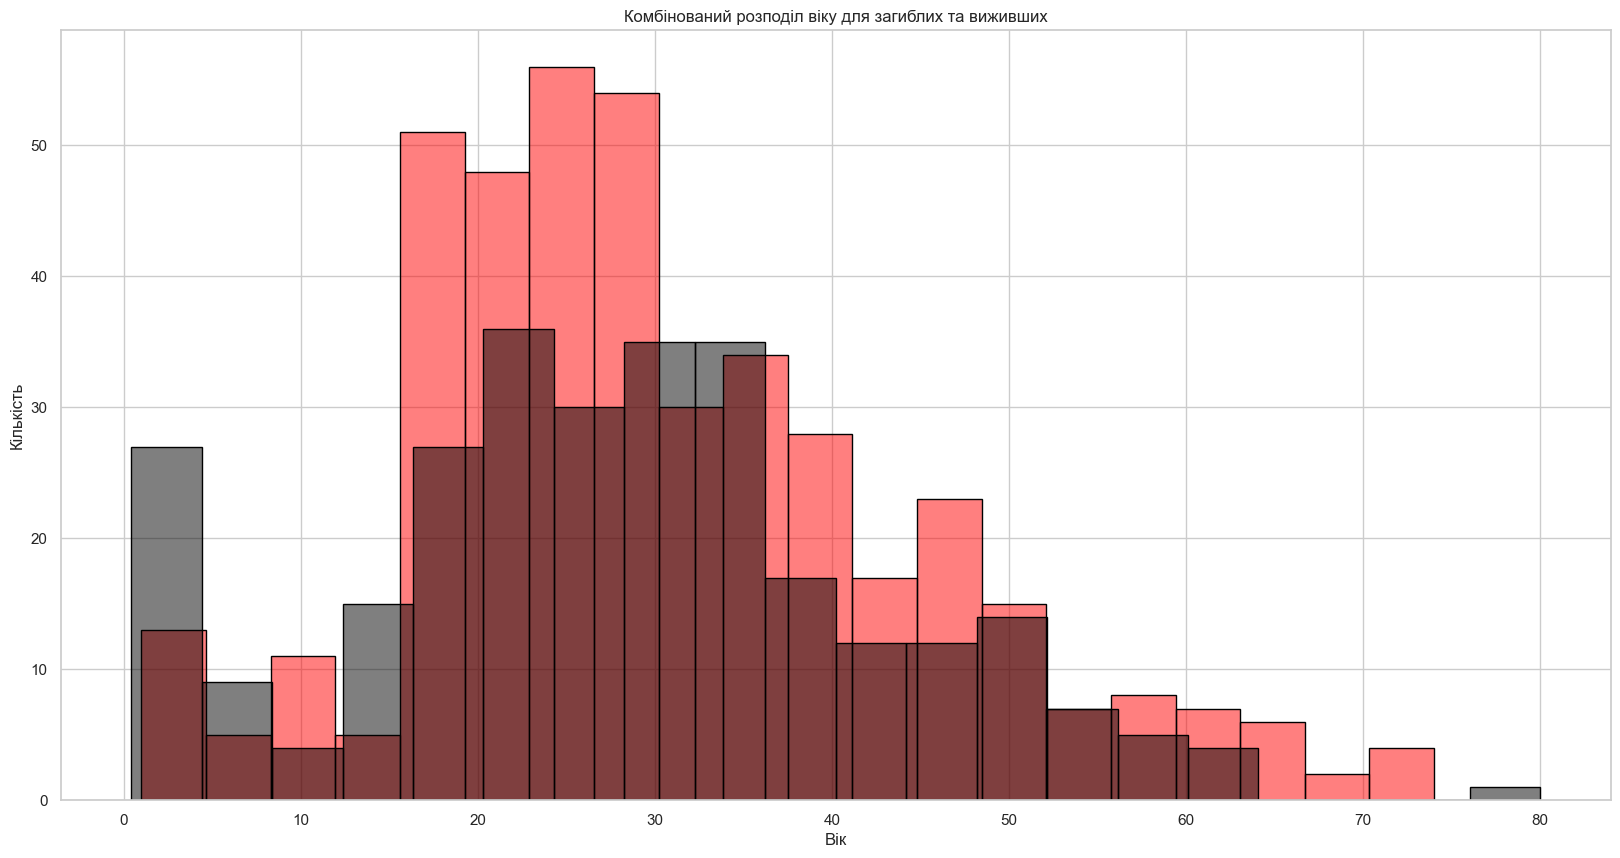

In [137]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(dataset[dataset['Survived'] == 0].Age, bins=20, kde=False, color='red', edgecolor='black', label='Загинули', alpha=0.5, ax=ax[0])
ax[0].set_title('Розподіл віку серед загиблих')
ax[0].set_xlabel('Вік')
ax[0].set_ylabel('Кількість')
ax[0].legend()
sns.histplot(dataset[dataset['Survived'] == 1].Age, bins=20, kde=False, color='black', edgecolor='black', label='Вижили', alpha=0.5, ax=ax[1])
ax[1].set_title('Розподіл віку серед виживших')
ax[1].set_xlabel('Вік')
ax[1].set_ylabel('Кількість')
ax[1].legend()
plt.show()
plt.figure(figsize=(20, 10))
sns.histplot(dataset[dataset['Survived'] == 0].Age, bins=20, kde=False, color='red', edgecolor='black', label='Загинули', alpha=0.5)
sns.histplot(dataset[dataset['Survived'] == 1].Age, bins=20, kde=False, color='black', edgecolor='black', label='Вижили', alpha=0.5)
plt.title('Комбінований розподіл віку для загиблих та виживших')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()


1) Розглядаючи гістограму, можна припустити, що найбільше відчуття загибелі виникає, дивлячись на пасажирів у віці від 18 до 30 років. Цільова група від 18 до 30 років здається особливо вразливою до факторів, що впливають на виживання.
2) На жаль, побудовані візуалізації недостатні для об'єктивних висновків щодо розподілів та статистичних оцінок. Хоча графіки надають загальний огляд ситуації, для точних висновків необхідно провести детальний статистичний аналіз. Враховуючи побудовані візуалізації, можна створити гіпотези та формулювати питання для подальшого дослідження. Додатковий статистичний аналіз допоможе підтвердити або спростувати ці гіпотези та надасть об'єктивний підхід до вивчення даних.

Завдання (9)

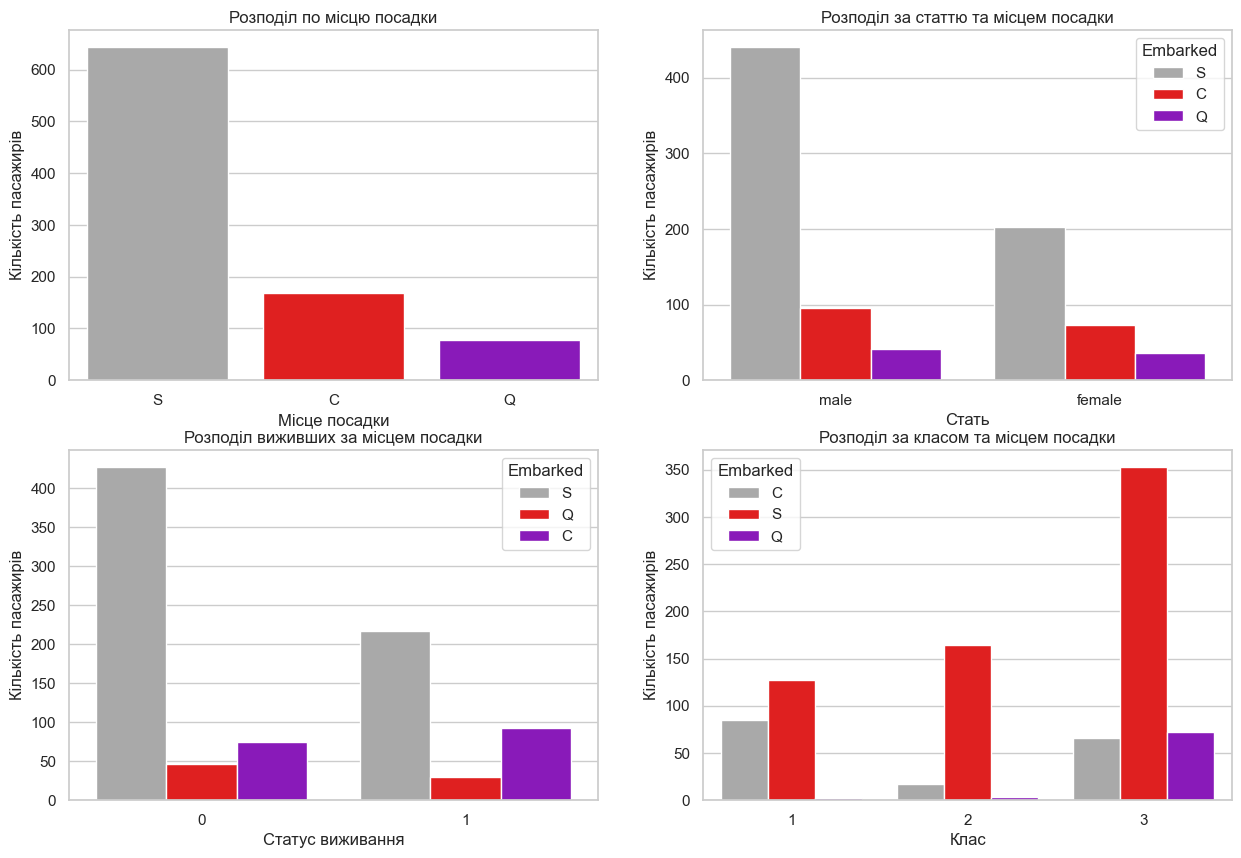

In [136]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Embarked', data=dataset, ax=ax[0, 0], palette=['darkgray', 'red', 'darkviolet'])
ax[0, 0].set_title('Розподіл по місцю посадки')
ax[0, 0].set_xlabel('Місце посадки')
ax[0, 0].set_ylabel('Кількість пасажирів')
sns.countplot(x='Sex', hue='Embarked', data=dataset, ax=ax[0, 1], palette=['darkgray', 'red', 'darkviolet'])
ax[0, 1].set_title('Розподіл за статтю та місцем посадки')
ax[0, 1].set_xlabel('Стать')
ax[0, 1].set_ylabel('Кількість пасажирів')
sns.countplot(x='Survived', hue='Embarked', data=dataset, ax=ax[1, 0], palette=['darkgray', 'red', 'darkviolet'])
ax[1, 0].set_title('Розподіл виживших за місцем посадки')
ax[1, 0].set_xlabel('Статус виживання')
ax[1, 0].set_ylabel('Кількість пасажирів')
sns.countplot(x='Pclass', hue='Embarked', data=dataset, ax=ax[1, 1], palette=['darkgray', 'red', 'darkviolet'])
ax[1, 1].set_title('Розподіл за класом та місцем посадки')
ax[1, 1].set_xlabel('Клас')
ax[1, 1].set_ylabel('Кількість пасажирів')
plt.show()

Враховуючи надану візуалізацію, можна зробити висновок, що загальна кількість загиблих переважно складалася з чоловіків. Це підтверджується спостереженням, що більшість чоловіків знаходилися в секторі S, де зафіксовано найвищу смертність серед пасажирів.

Завдання (10)

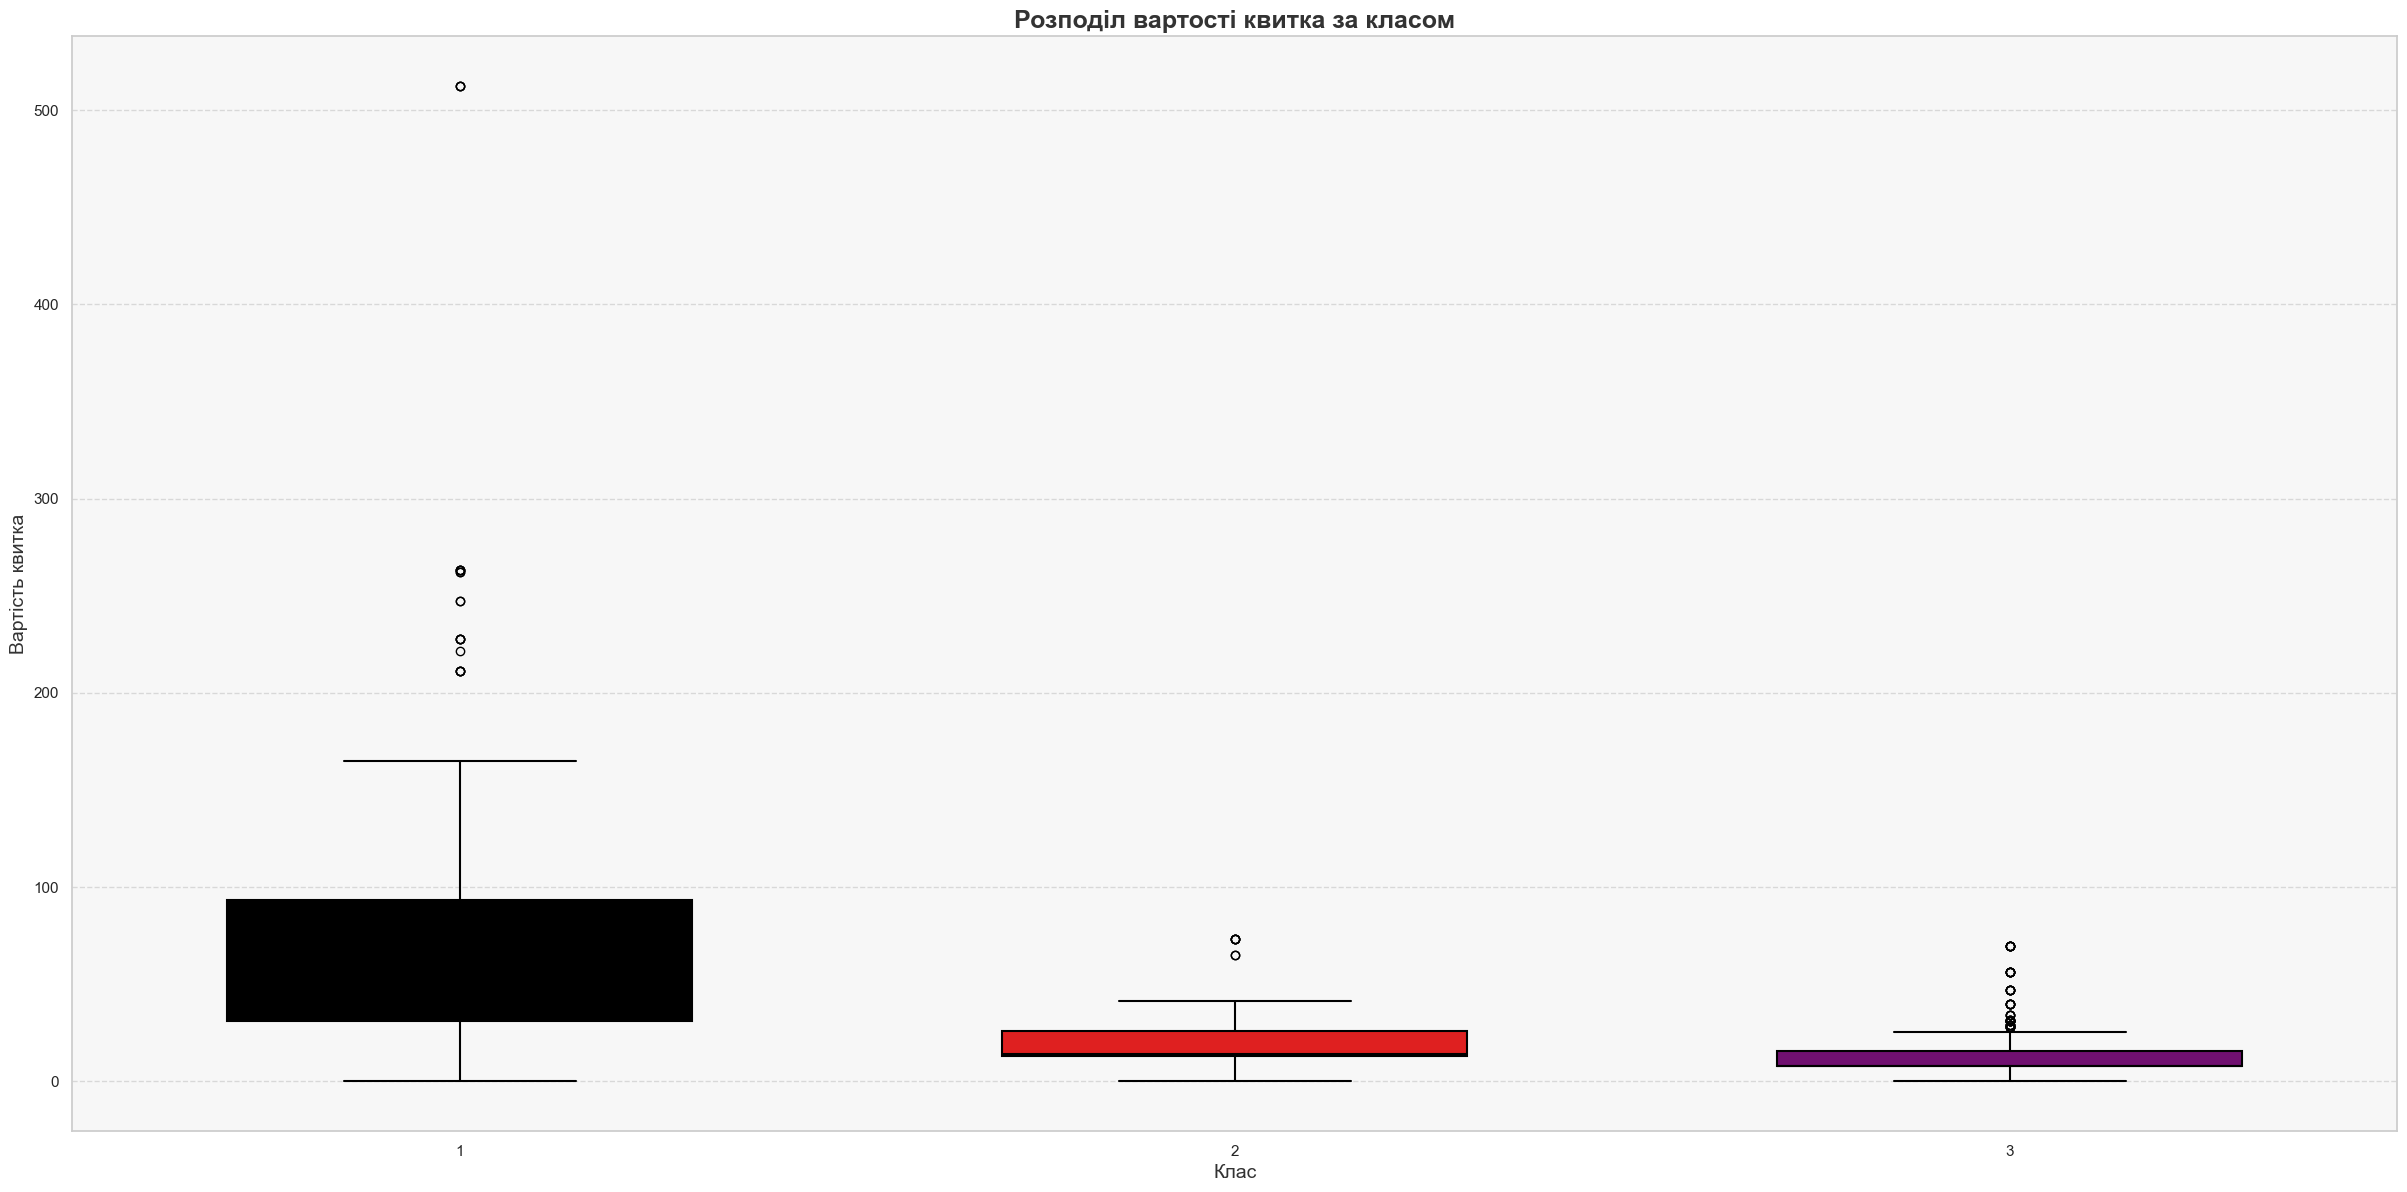

In [142]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("./titanic.csv")
filtered_df = dataset[["Pclass", "Fare"]]
sns.set(style="whitegrid")
colors = ["#000000", "#FF0000", "#800080"]
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(30, 15))
    sns.boxplot(x="Pclass", y="Fare", data=filtered_df, palette=colors, width=0.6, linewidth=1.5)
    plt.title('Розподіл вартості квитка за класом', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Клас', fontsize=14, color='#333333')
    plt.ylabel('Вартість квитка', fontsize=14, color='#333333')
    plt.gca().set_facecolor('#f7f7f7')
    plt.subplots_adjust(bottom=0.15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
   
    plt.show()


1) Пасажири першого класу мали найвищу середню вартість квитків серед усіх класів
2) Для пасажирів другого та третього класу спостерігався більш рівномірний розподіл вартості квитків. Зазначено, що середня вартість квитків другого класу була вищою, ніж для третього класу.
3) Виявлено викиди в вартості квитків для кожного класу, що може бути пов'язане з особливими обставинами або можливими помилками в даних.